In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
all_houses = pd.read_csv('all_houses.csv')

In [3]:
all_houses.head(5)

,Room,Area,Price,Security,Location,Zhk,Studio_kitchen,Previous_dorm,Furniture,State,...,Flat_facilities,Separated_toilet,Toilet_count,Bathroom,Window_side,Balcony_count,Loggia_count,Who_can_stay,Efloor,Floor_count
0,1,32,180000,Unknown,"Алматы, Бостандыкский р-н\nпоказать на карте",Not a Zhk,нет,нет,полностью,Unknown,...,Unknown,Unknown,1,ванна,во двор,1,0,Everyone,2,4.0
1,2,60,320000,Unknown,"Алматы, Бостандыкский р-н\nпоказать на карте",RAMS CITY,да,Unknown,полностью,"свежий ремонт, новая мебель",...,Unknown,Unknown,1,Unknown,Unknown,0,0,Everyone,4,17.0
2,2,61,330000,Unknown,"Алматы, Бостандыкский р-н\nпоказать на карте",Four Seasons,нет,нет,полностью,"свежий ремонт, новая мебель",...,"интернет, телевизор, стиральная машина, холоди...",совмещен,1,Unknown,во двор,0,0,Everyone,3,12.0
3,2,45,230000,Unknown,"Алматы, Бостандыкский р-н\nпоказать на карте",Аскар Тау,нет,Unknown,Unknown,Unknown,...,Unknown,Unknown,1,Unknown,Unknown,0,0,Everyone,4,6.0
4,2,44,450000,"домофон, видеонаблюдение, решетки на окнах","Алматы, Бостандыкский р-н\nпоказать на карте",Not a Zhk,нет,нет,полностью,"свежий ремонт, новая мебель",...,"интернет, холодильник, стиральная машина, теле...",совмещен,1,ванна,на улицу,0,0,"семейной паре, некурящим, одному человеку",1,4.0


In [4]:
all_houses['Location'] = all_houses['Location'].str.split('р-н').str[0].str.strip()

In [5]:
df = all_houses.copy()
df = df.assign(state=df['State'].str.split(', '))
df = df.assign(security=df['Security'].str.split(', '))
df = df.assign(flat_facilities=df['Flat_facilities'].str.split(', '))
df = df.assign(who_can_stay=df['Who_can_stay'].str.split(', '))
df = df.assign(deep_info_furniture=df['Deep_info_furniture'].str.split(', '))
df.head(5)

,Room,Area,Price,Security,Location,Zhk,Studio_kitchen,Previous_dorm,Furniture,State,...,Balcony_count,Loggia_count,Who_can_stay,Efloor,Floor_count,state,security,flat_facilities,who_can_stay,deep_info_furniture
0,1,32,180000,Unknown,"Алматы, Бостандыкский",Not a Zhk,нет,нет,полностью,Unknown,...,1,0,Everyone,2,4.0,[Unknown],[Unknown],[Unknown],[Everyone],[Unknown]
1,2,60,320000,Unknown,"Алматы, Бостандыкский",RAMS CITY,да,Unknown,полностью,"свежий ремонт, новая мебель",...,0,0,Everyone,4,17.0,"[свежий ремонт, новая мебель]",[Unknown],[Unknown],[Everyone],[Unknown]
2,2,61,330000,Unknown,"Алматы, Бостандыкский",Four Seasons,нет,нет,полностью,"свежий ремонт, новая мебель",...,0,0,Everyone,3,12.0,"[свежий ремонт, новая мебель]",[Unknown],"[интернет, телевизор, стиральная машина, холод...",[Everyone],"[кровать, обеденный стол, шкаф для одежды, кух..."
3,2,45,230000,Unknown,"Алматы, Бостандыкский",Аскар Тау,нет,Unknown,Unknown,Unknown,...,0,0,Everyone,4,6.0,[Unknown],[Unknown],[Unknown],[Everyone],[Unknown]
4,2,44,450000,"домофон, видеонаблюдение, решетки на окнах","Алматы, Бостандыкский",Not a Zhk,нет,нет,полностью,"свежий ремонт, новая мебель",...,0,0,"семейной паре, некурящим, одному человеку",1,4.0,"[свежий ремонт, новая мебель]","[домофон, видеонаблюдение, решетки на окнах]","[интернет, холодильник, стиральная машина, тел...","[семейной паре, некурящим, одному человеку]","[шкаф для одежды, рабочий стол, кухонный гарни..."


In [6]:
df = df.explode('state')
df = df.explode('security')
df = df.explode('flat_facilities')
df = df.explode('who_can_stay')
df = df.explode('deep_info_furniture')

df.head(5)

,Room,Area,Price,Security,Location,Zhk,Studio_kitchen,Previous_dorm,Furniture,State,...,Balcony_count,Loggia_count,Who_can_stay,Efloor,Floor_count,state,security,flat_facilities,who_can_stay,deep_info_furniture
0,1,32,180000,Unknown,"Алматы, Бостандыкский",Not a Zhk,нет,нет,полностью,Unknown,...,1,0,Everyone,2,4.0,Unknown,Unknown,Unknown,Everyone,Unknown
1,2,60,320000,Unknown,"Алматы, Бостандыкский",RAMS CITY,да,Unknown,полностью,"свежий ремонт, новая мебель",...,0,0,Everyone,4,17.0,свежий ремонт,Unknown,Unknown,Everyone,Unknown
1,2,60,320000,Unknown,"Алматы, Бостандыкский",RAMS CITY,да,Unknown,полностью,"свежий ремонт, новая мебель",...,0,0,Everyone,4,17.0,новая мебель,Unknown,Unknown,Everyone,Unknown
2,2,61,330000,Unknown,"Алматы, Бостандыкский",Four Seasons,нет,нет,полностью,"свежий ремонт, новая мебель",...,0,0,Everyone,3,12.0,свежий ремонт,Unknown,интернет,Everyone,кровать
2,2,61,330000,Unknown,"Алматы, Бостандыкский",Four Seasons,нет,нет,полностью,"свежий ремонт, новая мебель",...,0,0,Everyone,3,12.0,свежий ремонт,Unknown,интернет,Everyone,обеденный стол


In [7]:
df = df.drop(columns = ['State','Security','Flat_facilities', 'Who_can_stay', 'Deep_info_furniture'])


In [8]:
df = df.dropna()

In [9]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
df = df.astype(int)

In [11]:
df

,Room,Area,Price,Toilet_count,Balcony_count,Loggia_count,Efloor,Floor_count,"Location_Алматы, Бостандыкский","Location_Алматы, Наурызбайский",...,who_can_stay_можно с животными,who_can_stay_некурящим,who_can_stay_одному человеку,who_can_stay_семейной паре,deep_info_furniture_диван,deep_info_furniture_кровать,deep_info_furniture_кухонный гарнитур,deep_info_furniture_обеденный стол,deep_info_furniture_рабочий стол,deep_info_furniture_шкаф для одежды
0,1,32,180000,1,1,0,2,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,60,320000,1,0,0,4,17,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,60,320000,1,0,0,4,17,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,61,330000,1,0,0,3,12,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2,61,330000,1,0,0,3,12,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,2,68,330000,1,2,2,9,9,0,0,...,0,0,1,0,0,0,0,1,0,0
2015,2,68,330000,1,2,2,9,9,0,0,...,0,0,1,0,0,0,0,0,0,1
2015,2,68,330000,1,2,2,9,9,0,0,...,0,0,1,0,0,0,1,0,0,0
2015,2,68,330000,1,2,2,9,9,0,0,...,0,0,1,0,0,0,0,0,1,0


In [12]:
X = df.drop(['Price'], axis=1)  # Features
y = df['Price']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Linear Regression

In [14]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)


print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R^2: {r2_score(y_test, y_pred_lr)}")

MAE: 48873.19267830889
MSE: 6742253374.107655
R^2: 0.7693081076716166


In [15]:
y_pred_lr[:5]

array([627093.86517698, 560270.52891108, 601746.0924655 , 568590.50373954,
       413063.55559571])

In [16]:
y_test[:5]

652    700000
62     550000
139    480000
438    550000
43     400000
Name: Price, dtype: int32

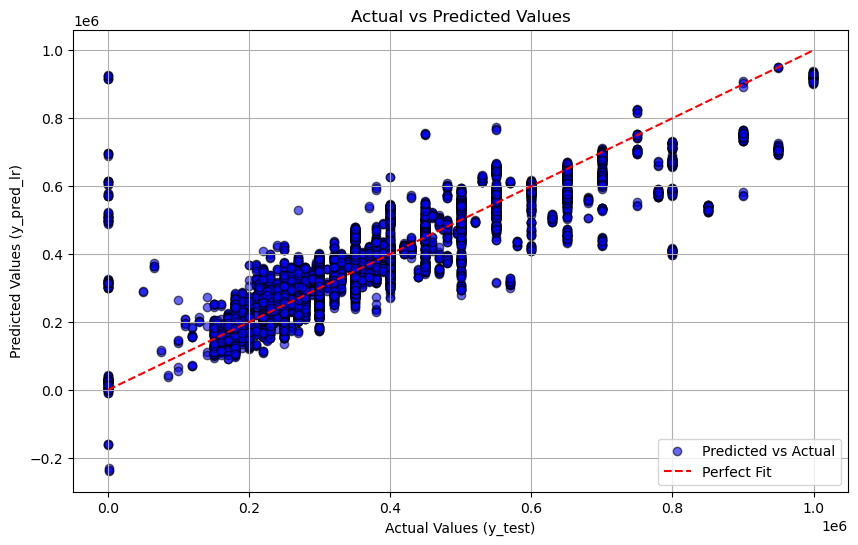

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:10000], y_pred_lr[:10000], alpha=0.6, color='blue', edgecolor='k', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')  # Diagonal line
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred_lr)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()

#### Logistic Regression

In [29]:

y_class = (y > y.median()).astype(int)


X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_class_scaled, y_train_class)

y_pred_log_reg = log_reg_model.predict(X_test_class_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test_class, y_pred_log_reg))

Logistic Regression Accuracy: 0.9303560146705285


In [30]:
y_test_class[:10]

652     1
62      1
139     1
438     1
43      1
1997    0
252     0
1005    1
876     1
626     1
Name: Price, dtype: int32

In [31]:
y_pred_log_reg[:10]

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

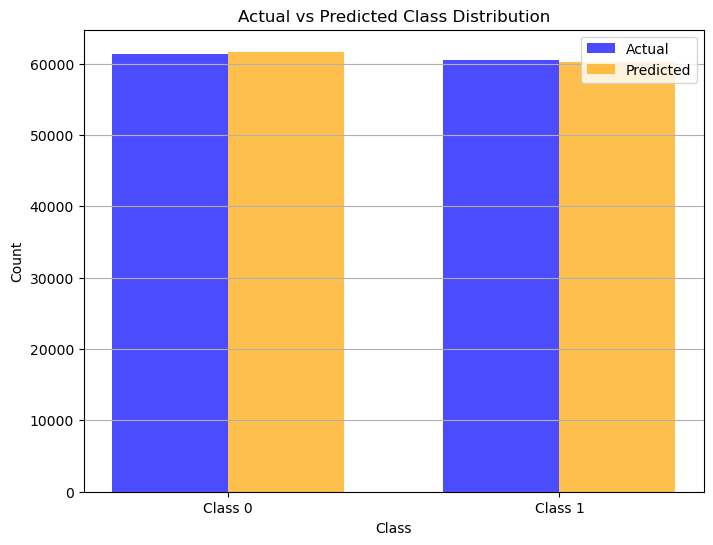

In [37]:
import numpy as np

# Count actual and predicted class distributions
actual_counts = np.bincount(y_test_class)
predicted_counts = np.bincount(y_pred_log_reg)

# Bar plot
bar_width = 0.35
indices = np.arange(len(actual_counts))

plt.figure(figsize=(8, 6))
plt.bar(indices, actual_counts, bar_width, label='Actual', color='blue', alpha=0.7)
plt.bar(indices + bar_width, predicted_counts, bar_width, label='Predicted', color='orange', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(indices + bar_width / 2, [f'Class {i}' for i in range(len(actual_counts))])
plt.title('Actual vs Predicted Class Distribution')
plt.legend()
plt.grid(axis='y')
plt.show()


#### Decision Tree

In [38]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)


print(f"MAE: {mean_absolute_error(y_test, y_pred_dt)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dt)}")
print(f"R^2: {r2_score(y_test, y_pred_dt)}")

MAE: 266.5884457280701
MSE: 15480615.702716673
R^2: 0.9994703176619582


In [39]:
y_pred_dt[:10]

array([700000., 550000., 480000., 550000., 400000., 290000., 325000.,
       350000., 350000., 550000.])

In [40]:
y_test[:10]

652     700000
62      550000
139     480000
438     550000
43      400000
1997    290000
252     325000
1005    350000
876     350000
626     550000
Name: Price, dtype: int32

In [41]:
y_pred_dt[:10] == y_test[:10]

652     True
62      True
139     True
438     True
43      True
1997    True
252     True
1005    True
876     True
626     True
Name: Price, dtype: bool

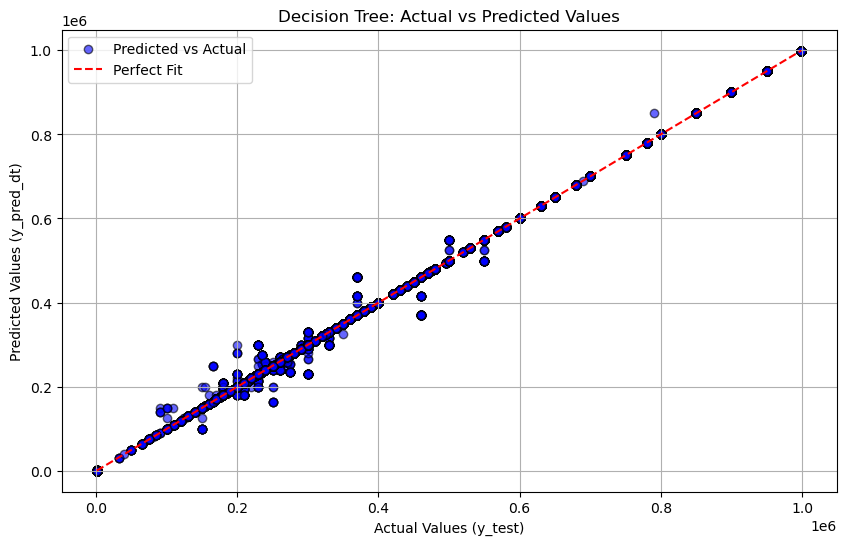

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.6, color='blue', edgecolor='k', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')  # Diagonal line
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred_dt)')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()

#### Random Forest

In [44]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled[:10000], y_train[:10000])

y_pred_rf = rf_model.predict(X_test_scaled[:10000])
print("Random Forest Regression Metrics:")
print(f"MAE: {mean_absolute_error(y_test[:10000], y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test[:10000], y_pred_rf)}")
print(f"R^2: {r2_score(y_test[:10000], y_pred_rf)}")

Random Forest Regression Metrics:
MAE: 3651.121
MSE: 193795906.75
R^2: 0.9931913633004791


In [45]:
y_pred_rf[:10]

array([700000., 550000., 480000., 546500., 400000., 290000., 325250.,
       350000., 350000., 550000.])

In [46]:
y_test[:10]

652     700000
62      550000
139     480000
438     550000
43      400000
1997    290000
252     325000
1005    350000
876     350000
626     550000
Name: Price, dtype: int32

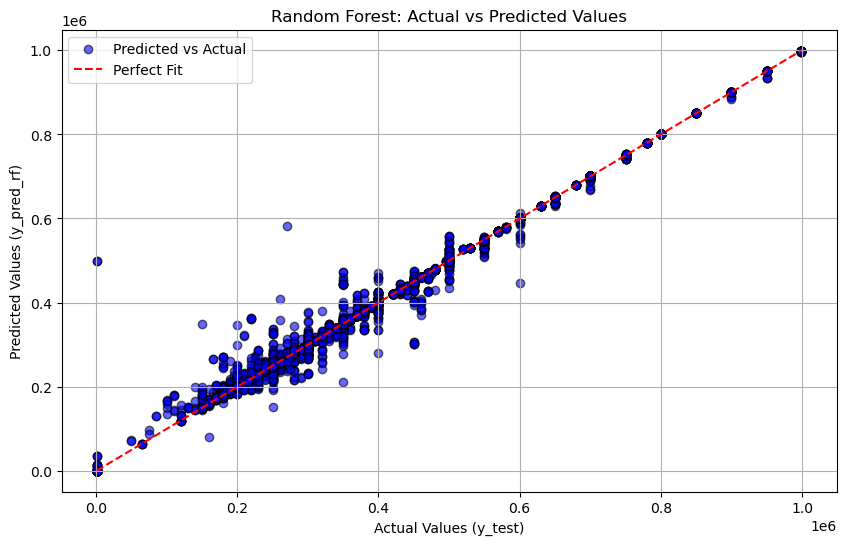

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:10000], y_pred_rf, alpha=0.6, color='blue', edgecolor='k', label='Predicted vs Actual')
plt.plot([min(y_test[:10000]), max(y_test[:10000])], [min(y_test[:10000]), max(y_test[:10000])], 
         color='red', linestyle='--', label='Perfect Fit')  
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred_rf)')
plt.title('Random Forest: Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()

#### SVM

In [49]:
svm_model = SVR()
svm_model.fit(X_train_scaled[:10000], y_train[:10000])

y_pred_svm = svm_model.predict(X_test_scaled[:10000])


print(f"MAE: {mean_absolute_error(y_test[:10000], y_pred_svm)}")
print(f"MSE: {mean_squared_error(y_test[:10000], y_pred_svm)}")
print(f"R^2: {r2_score(y_test[:10000], y_pred_svm)}")

MAE: 125233.44237126915
MSE: 29896850599.34185
R^2: -0.050366840066251584


In [50]:
y_pred_svm[:10]

array([330397.88483787, 330150.20161428, 330315.58799104, 330386.04447607,
       330364.0896915 , 329929.42079084, 329947.49364281, 330184.21388597,
       330385.51614635, 330447.89610744])

In [51]:
y_test[:10]

652     700000
62      550000
139     480000
438     550000
43      400000
1997    290000
252     325000
1005    350000
876     350000
626     550000
Name: Price, dtype: int32

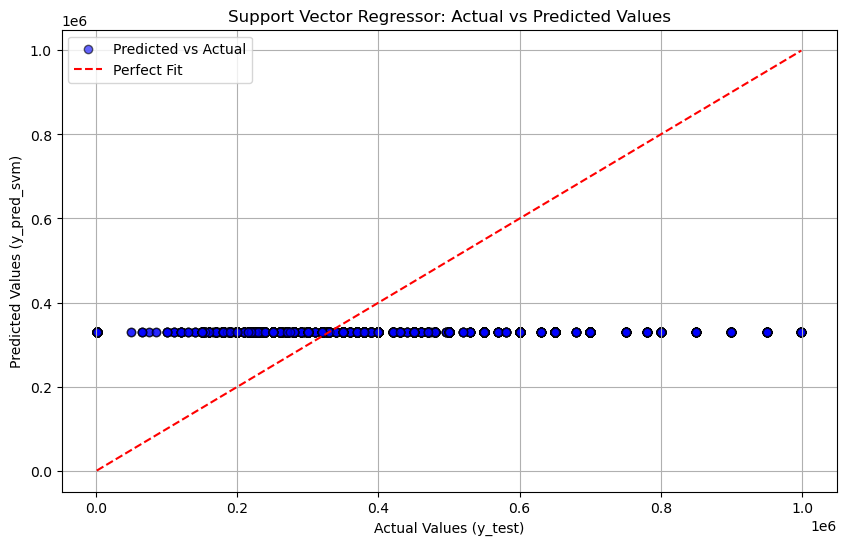

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:10000], y_pred_svm, alpha=0.6, color='blue', edgecolor='k', label='Predicted vs Actual')
plt.plot([min(y_test[:10000]), max(y_test[:10000])], [min(y_test[:10000]), max(y_test[:10000])], 
         color='red', linestyle='--', label='Perfect Fit')  # Diagonal line
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred_svm)')
plt.title('Support Vector Regressor: Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()

#### KNN

In [54]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled[:10000], y_train[:10000])

y_pred_knn = knn_model.predict(X_test_scaled[:10000])


print(f"MAE: {mean_absolute_error(y_test[:10000], y_pred_knn)}")
print(f"MSE: {mean_squared_error(y_test[:10000], y_pred_knn)}")
print(f"R^2: {r2_score(y_test[:10000], y_pred_knn)}")

MAE: 28916.44
MSE: 2728864592.0
R^2: 0.904126728367475


In [55]:
y_pred_knn[:10]

array([700000., 570000., 552000., 530000., 400000., 244000., 256000.,
       350000., 350000., 550000.])

In [56]:
y_test[:10]

652     700000
62      550000
139     480000
438     550000
43      400000
1997    290000
252     325000
1005    350000
876     350000
626     550000
Name: Price, dtype: int32

In [57]:
y_pred_knn[:10] == y_test[:10]

652      True
62      False
139     False
438     False
43       True
1997    False
252     False
1005     True
876      True
626      True
Name: Price, dtype: bool

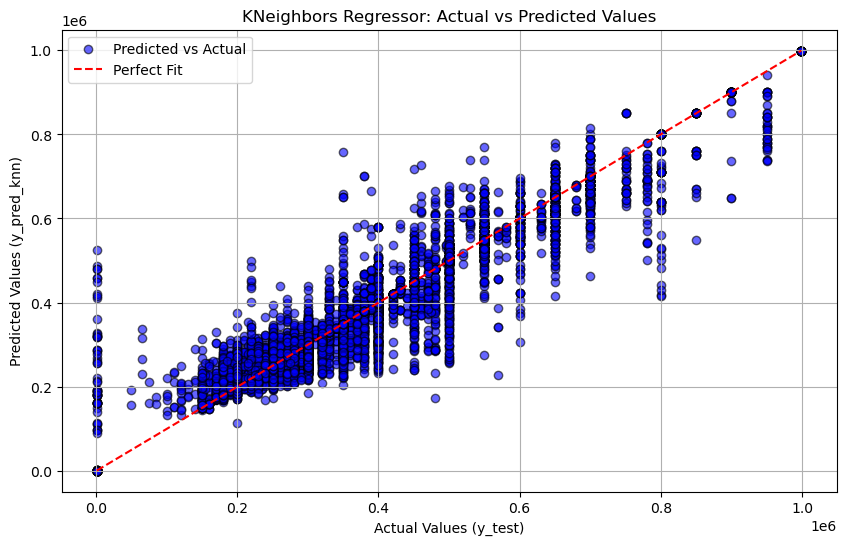

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:10000], y_pred_knn, alpha=0.6, color='blue', edgecolor='k', label='Predicted vs Actual')
plt.plot([min(y_test[:10000]), max(y_test[:10000])], [min(y_test[:10000]), max(y_test[:10000])], 
         color='red', linestyle='--', label='Perfect Fit')  # Diagonal line
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred_knn)')
plt.title('KNeighbors Regressor: Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()

# R2 square

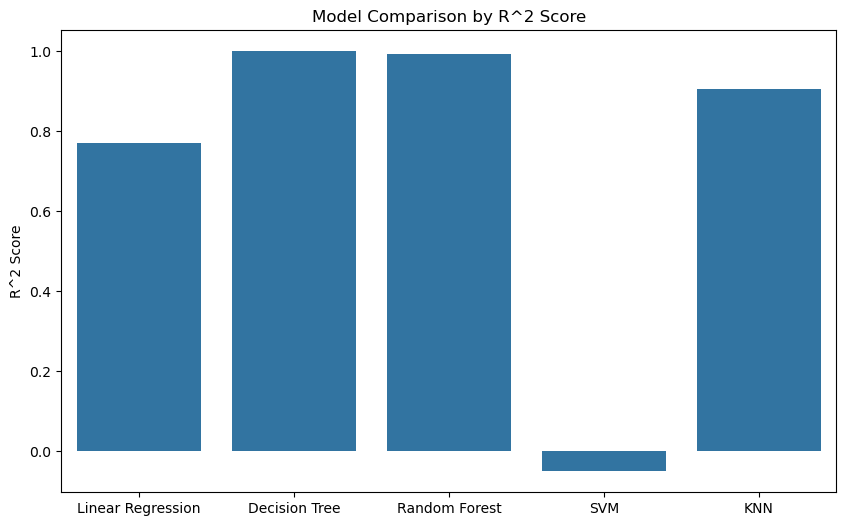

In [79]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_dt),
    r2_score(y_test[:10000], y_pred_rf),
    r2_score(y_test[:10000], y_pred_svm),
    r2_score(y_test[:10000], y_pred_knn)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_scores)
plt.title('Model Comparison by R^2 Score')
plt.ylabel('R^2 Score')
plt.show()